<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Sommaire
        </h1>
    </div>
</div>

- **[Preparation du dataset](#pre)**

- **[Verification des annotations](#ve)**

- **[Yolo v5 parametrage](#pa)**

- **[Yolo v5 entrainement](#en)**

- **[Resultat](#re)**

- **[Test du modele](#te)**





In [1]:
from google.colab import drive
drive.mount('/content/ShardDrives/', force_remount=True)

Mounted at /content/ShardDrives/


In [13]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw
import random

In [9]:
pwd

'/media/ismail/Elements/formation/projet7'

<a name='pre'></a>
<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Preparation du datatset
        </h1>
    </div>
</div>

In [11]:
dogs_list = ['affenpinscher','Afghan_hound','African_hunting_dog','Airedale','American_Staffordshire_terrier','Appenzeller','Australian_terrier','basenji','basset','beagle','Bedlington_terrier','Bernese_mountain_dog','black-and-tan_coonhound','Blenheim_spaniel','bloodhound','bluetick','Border_collie','Border_terrier','borzoi','Boston_bull','Bouvier_des_Flandres','boxer','Brabancon_griffon','briard','Brittany_spaniel','bull_mastiff','cairn','Cardigan','Chesapeake_Bay_retriever','Chihuahua','chow','clumber','cocker_spaniel','collie','Rottweiler','Saint_Bernard','Saluki','Samoyed','schipperke','Scotch_terrier','Scottish_deerhound','Sealyham_terrier','Shetland_sheepdog','Shih-Tzu','Siberian_husky','silky_terrier','soft-coated_wheaten_terrier','Staffordshire_bullterrier','standard_poodle','standard_schnauzer','Sussex_spaniel','Tibetan_mastiff','Tibetan_terrier','toy_poodle','toy_terrier','vizsla','Walker_hound','Weimaraner','Welsh_springer_spaniel','West_Highland_white_terrier','whippet','wire-haired_fox_terrier','Yorkshire_terrier','Dandie_Dinmont','dhole','dingo','Doberman','English_foxhound','English_setter','English_springer','EntleBucher','Eskimo_dog','flat-coated_retriever','French_bulldog','German_shepherd','German_short-haired_pointer','giant_schnauzer','golden_retriever','Gordon_setter','Greater_Swiss_Mountain_dog','Great_Dane','Great_Pyrenees','groenendael','Irish_setter','Irish_terrier','Irish_water_spaniel','Irish_wolfhound','Italian_greyhound','Japanese_spaniel','keeshond','kelpie','Kerry_blue_terrier','komondor','kuvasz','Labrador_retriever','Lakeland_terrier','Leonberg','Lhasa','malamute','malinois','Maltese_dog','Mexican_hairless','miniature_pinscher','miniature_poodle','miniature_schnauzer','curly-coated_retriever','Ibizan_hound','Newfoundland','Rhodesian_ridgeback','Norfolk_terrier','Norwegian_elkhound','Norwich_terrier','Old_English_sheepdog','otterhound','papillon','Pekinese','Pembroke','Pomeranian','pug','redbone']
dogs_dict = {}
for i, elem in enumerate(dogs_list):
    dogs_dict[elem] = i
print(dogs_dict)

{'affenpinscher': 0, 'Afghan_hound': 1, 'African_hunting_dog': 2, 'Airedale': 3, 'American_Staffordshire_terrier': 4, 'Appenzeller': 5, 'Australian_terrier': 6, 'basenji': 7, 'basset': 8, 'beagle': 9, 'Bedlington_terrier': 10, 'Bernese_mountain_dog': 11, 'black-and-tan_coonhound': 12, 'Blenheim_spaniel': 13, 'bloodhound': 14, 'bluetick': 15, 'Border_collie': 16, 'Border_terrier': 17, 'borzoi': 18, 'Boston_bull': 19, 'Bouvier_des_Flandres': 20, 'boxer': 21, 'Brabancon_griffon': 22, 'briard': 23, 'Brittany_spaniel': 24, 'bull_mastiff': 25, 'cairn': 26, 'Cardigan': 27, 'Chesapeake_Bay_retriever': 28, 'Chihuahua': 29, 'chow': 30, 'clumber': 31, 'cocker_spaniel': 32, 'collie': 33, 'Rottweiler': 34, 'Saint_Bernard': 35, 'Saluki': 36, 'Samoyed': 37, 'schipperke': 38, 'Scotch_terrier': 39, 'Scottish_deerhound': 40, 'Sealyham_terrier': 41, 'Shetland_sheepdog': 42, 'Shih-Tzu': 43, 'Siberian_husky': 44, 'silky_terrier': 45, 'soft-coated_wheaten_terrier': 46, 'Staffordshire_bullterrier': 47, 'stan

In [25]:
import os
import sys
annotations = []
# directory = os.path.dirname(os.path.realpath(sys.argv[0])) #get the directory of your script
for subdir, dirs, files in os.walk('/media/ismail/Elements/formation/projet7/standford_dogs_dataset_yolo/labels/'):
    for filename in files:
        subdirectoryPath = os.path.relpath(subdir, 'Annotation') #get the path to your subdirectory
        filePath = os.path.join(subdirectoryPath, filename) #get the path to your file
#         annotations.append('./Annotation/'+filename+'.xml')
        path = '/media/ismail/Elements/formation/projet7/standford_dogs_dataset_yolo/labels/'+ subdirectoryPath+'/'
        annotations.append(filePath.replace('..','.'))
#         print(subdirectoryPath)
#         print(filename.find('.xml'))

print(annotations[0])

./standford_dogs_dataset_yolo/labels/test/n02085620_11258.txt


<a name='ve'></a>
<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Verification des annotations
        </h1>
    </div>
</div>

In [14]:
random.seed(0)

class_id_to_name_mapping = dict(zip(dogs_dict.values(), dogs_dict.keys()))

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    
    plt.imshow(np.array(image))
    plt.show()


./standford_dogs_dataset_yolo/images/train/n02097658_11313.jpg ./standford_dogs_dataset_yolo/images/train/n02097658_11313.jpg


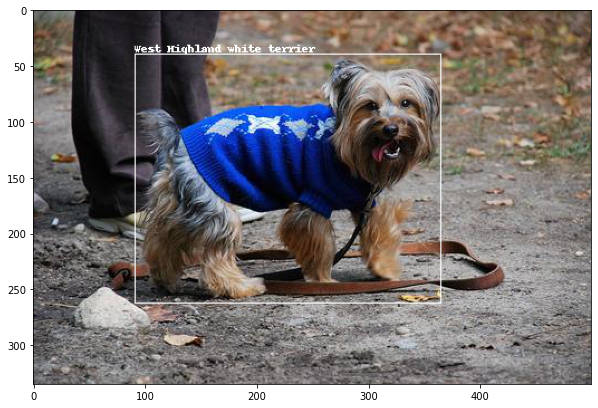

In [29]:
random.seed(18)
plt.figure(figsize=(10,10)) 
# Get any random annotation file 
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("labels", "images").replace("txt", "jpg")
print(image_file,image_file)
# assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

./standford_dogs_dataset_yolo/images/train/n02088364_17530.jpg ./standford_dogs_dataset_yolo/images/train/n02088364_17530.jpg


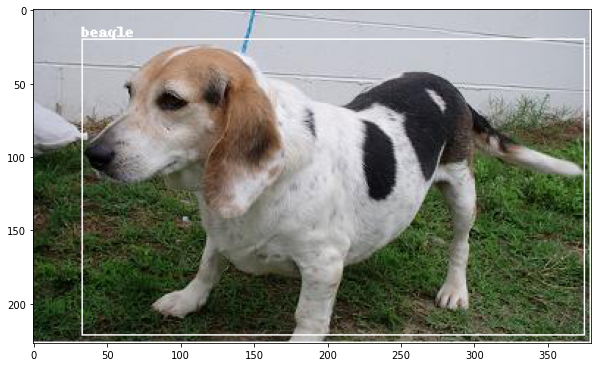

In [30]:
random.seed(1000)
plt.figure(figsize=(10,10)) 
# Get any random annotation file 
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("labels", "images").replace("txt", "jpg")
print(image_file,image_file)
# assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

In [2]:
!rm -rf /content/standford_dogs_dataset

In [ ]:
!unzip /content/ShardDrives/MyDrive/dogs/standford_dogs_dataset.zip -d /content/

<a name='pa'></a>
<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Yolo v5 parametrage
        </h1>
    </div>
</div>
Nous allons dans un premier temp, preparer notre dataset au format yolo

In [4]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 13049, done.
remote: Total 13049 (delta 0), reused 0 (delta 0), pack-reused 13049
Receiving objects: 100% (13049/13049), 11.97 MiB | 4.82 MiB/s, done.
Resolving deltas: 100% (9070/9070), done.


In [2]:
cat /media/ismail/Elements/formation/projet7/standford_dogs_dataset_yolo/dogs.yaml

train: ../standford_dogs_dataset/images/train/ 
val:  ../standford_dogs_dataset/images/val/
test: ../standford_dogs_dataset/images/test/

# number of classes
nc: 120

# class names
names: ['affenpinscher','Afghan_hound','African_hunting_dog','Airedale','American_Staffordshire_terrier','Appenzeller','Australian_terrier','basenji','basset','beagle','Bedlington_terrier','Bernese_mountain_dog','black-and-tan_coonhound','Blenheim_spaniel','bloodhound','bluetick','Border_collie','Border_terrier','borzoi','Boston_bull','Bouvier_des_Flandres','boxer','Brabancon_griffon','briard','Brittany_spaniel','bull_mastiff','cairn','Cardigan','Chesapeake_Bay_retriever','Chihuahua','chow','clumber','cocker_spaniel','collie','Rottweiler','Saint_Bernard','Saluki','Samoyed','schipperke','Scotch_terrier','Scottish_deerhound','Sealyham_terrier','Shetland_sheepdog','Shih-Tzu','Siberian_husky','silky_terrier','soft-coated_wheaten_terrier','Staffordshire_bullterrier','standard_poodle','standard_schnauzer','Sussex_

In [5]:
!cp -avr /content/ShardDrives/MyDrive/dogs/dogs.yaml /content/yolov5/data/dogs.yaml

'/content/ShardDrives/MyDrive/dogs/dogs.yaml' -> '/content/yolov5/data/dogs.yaml'


In [ ]:
!cp -avr /content/ShardDrives/MyDrive/dogs/yolov5x.yaml /content/yolov5/models/yolov5x.yaml

'/content/ShardDrives/MyDrive/dogs/yolov5x.yaml' -> '/content/yolov5/models/yolov5x.yaml'


In [6]:
!cp -avr /content/ShardDrives/MyDrive/dogs/yolov5l.yaml /content/yolov5/models/yolov5l.yaml

'/content/ShardDrives/MyDrive/dogs/yolov5l.yaml' -> '/content/yolov5/models/yolov5l.yaml'


In [7]:
cd /content/yolov5

/content/yolov5


In [ ]:
pwd

'/content/yolov5'

In [ ]:
!pip install wandb
!wandb login

wandb: Currently logged in as: ismail-azdad (use `wandb login --relogin` to force relogin)


In [ ]:
!wandb.init(project="dogs_5l", entity="ismail-azdad")

/bin/bash: -c: line 0: syntax error near unexpected token `project="dogs_5l",'
/bin/bash: -c: line 0: `wandb.init(project="dogs_5l", entity="ismail-azdad")'


<a name='en'></a>
<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Yolo v5 entrainement
        </h1>
    </div>
</div>

In [ ]:
# !python train.py --img 640 --cfg yolov5s.yaml  --batch 32 --epochs 100 --data dogs.yaml --weights yolov5s.pt --workers 24 --name dogs

# !python train.py --img 640 --batch 16 --epochs 50 --data dogs.yaml --weights yolov5x.pt --cfg yolov5x.yaml --name dogs  --cache
!python train.py --img 416 --batch 16 --epochs 50 --data dogs.yaml --weights yolov5l.pt --cfg yolov5l.yaml --name dogs --device 0 --cache

wandb: Currently logged in as: ismail-azdad (use `wandb login --relogin` to force relogin)
train: weights=yolov5l.pt, cfg=yolov5l.yaml, data=dogs.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=dogs, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-164-g177da7f torch 1.11.0+cu113 CUDA:0 (Tesla V100-SXM2-16GB, 16160MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj

In [ ]:
!mkdir /content/ShardDrives/MyDrive/dogs/dogs_result_5l

<a name='re'></a>
<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Resultat
        </h1>
    </div>
</div>

In [ ]:
!cp -fr /content/yolov5/runs/train/dogs3/ /content/ShardDrives/MyDrive/dogs/dogs_result_5l

In [ ]:
!cd /content/yolov5/

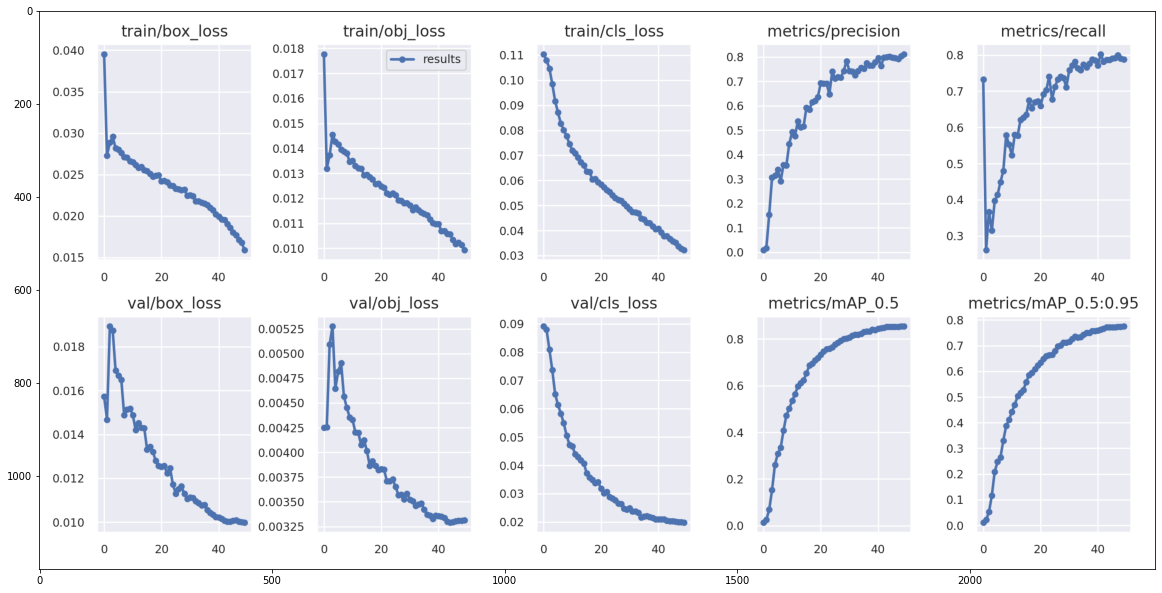

In [2]:
plt.figure(figsize=(20,20)) 
plt.imshow(np.array(Image.open("/media/ismail/Elements/formation/projet7/dogs_result_5l/dogs3/results.png")))

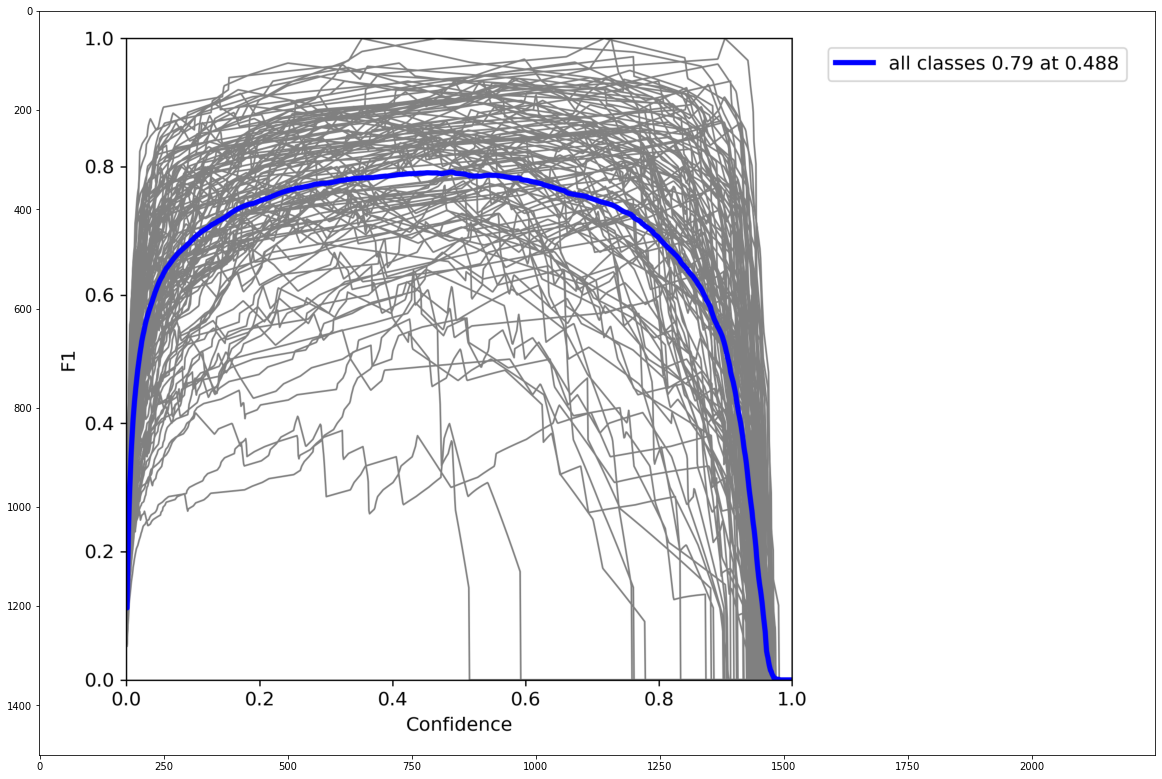

In [3]:
plt.figure(figsize=(20,20)) 
plt.imshow(np.array(Image.open("/media/ismail/Elements/formation/projet7/dogs_result_5l/dogs3/F1_curve.png")))

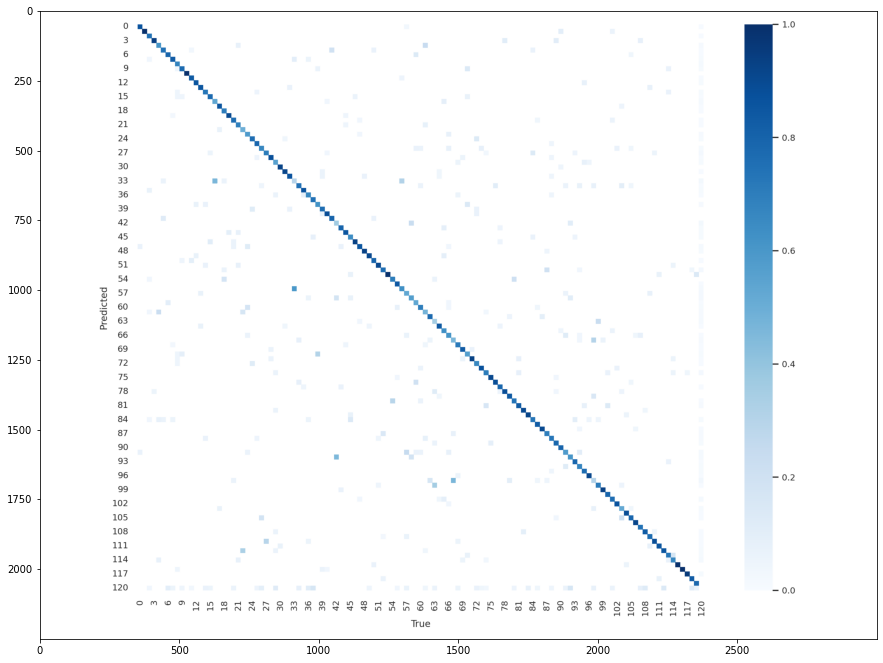

In [4]:
plt.figure(figsize=(15,15)) 
plt.imshow(np.array(Image.open("/media/ismail/Elements/formation/projet7/dogs_result_5l/dogs3/confusion_matrix.png")))

In [ ]:
!python detect.py --source /content/standford_dogs_dataset/images/test/ --weights runs/train/dogs3/weights/best.pt --conf 0.25 --name dogs

In [ ]:
!pwd

/content/yolov5


In [ ]:
!mkdir /content/ShardDrives/MyDrive/dogs/dogs_result_5x

In [ ]:
!cp -fr /content/yolov5/runs/val/dogs_test/ /content/ShardDrives/MyDrive/dogs/dogs_result_5x/dogs_test

<a name='te'></a>
<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Test du modele
        </h1>
    </div>
</div>

In [13]:
!python val.py --weights /content/ShardDrives/MyDrive/dogs/dogs_result_5l/l640/dogs4/weights/best.pt --data dogs.yaml --task test --name dogs_test --verbose

val: data=/content/yolov5/data/dogs.yaml, weights=['/content/ShardDrives/MyDrive/dogs/dogs_result_5l/l640/dogs4/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=test, device=, workers=8, single_cls=False, augment=False, verbose=True, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=dogs_test, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-165-g1a3ecb8 torch 1.11.0+cu113 CUDA:0 (Tesla V100-SXM2-16GB, 16160MiB)

Fusing layers... 
YOLOv5l summary: 367 layers, 46749093 parameters, 0 gradients
test: Scanning '/content/yolov5/../standford_dogs_dataset/labels/test.cache' images and labels... 2058 found, 0 missing, 0 empty, 0 corrupt: 100% 2058/2058 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 65/65 [00:23<00:00,  2.80it/s]
                 all       2058       2186      0.786      0.768      0.839      0.753
       affenpinscher       2058         

In [14]:
!python val.py --weights /content/ShardDrives/MyDrive/dogs/dogs_result_5x/dogs8/weights/best.pt --data dogs.yaml --task test --name dogs_test --verbose

val: data=/content/yolov5/data/dogs.yaml, weights=['/content/ShardDrives/MyDrive/dogs/dogs_result_5x/dogs8/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=test, device=, workers=8, single_cls=False, augment=False, verbose=True, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=dogs_test, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-165-g1a3ecb8 torch 1.11.0+cu113 CUDA:0 (Tesla V100-SXM2-16GB, 16160MiB)

Fusing layers... 
YOLOv5x summary: 444 layers, 86974165 parameters, 0 gradients
test: Scanning '/content/yolov5/../standford_dogs_dataset/labels/test.cache' images and labels... 2058 found, 0 missing, 0 empty, 0 corrupt: 100% 2058/2058 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 65/65 [00:32<00:00,  2.02it/s]
                 all       2058       2186      0.779      0.792      0.845      0.761
       affenpinscher       2058         13   

In [5]:
def show_images_from_directory(path, num_sample):
    fig = plt.figure(figsize=(30,50))
    fig.patch.set_facecolor('#377AB7')
    images = os.listdir(path + "/" )[:num_sample]
    for i in range(num_sample):
        img = imgmp.imread(path+"/"+images[i])
        plt.subplot(num_sample/num_sample+1, num_sample, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show() 

/tmp/ipykernel_93466/2009559517.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(num_sample/num_sample+1, num_sample, i+1)


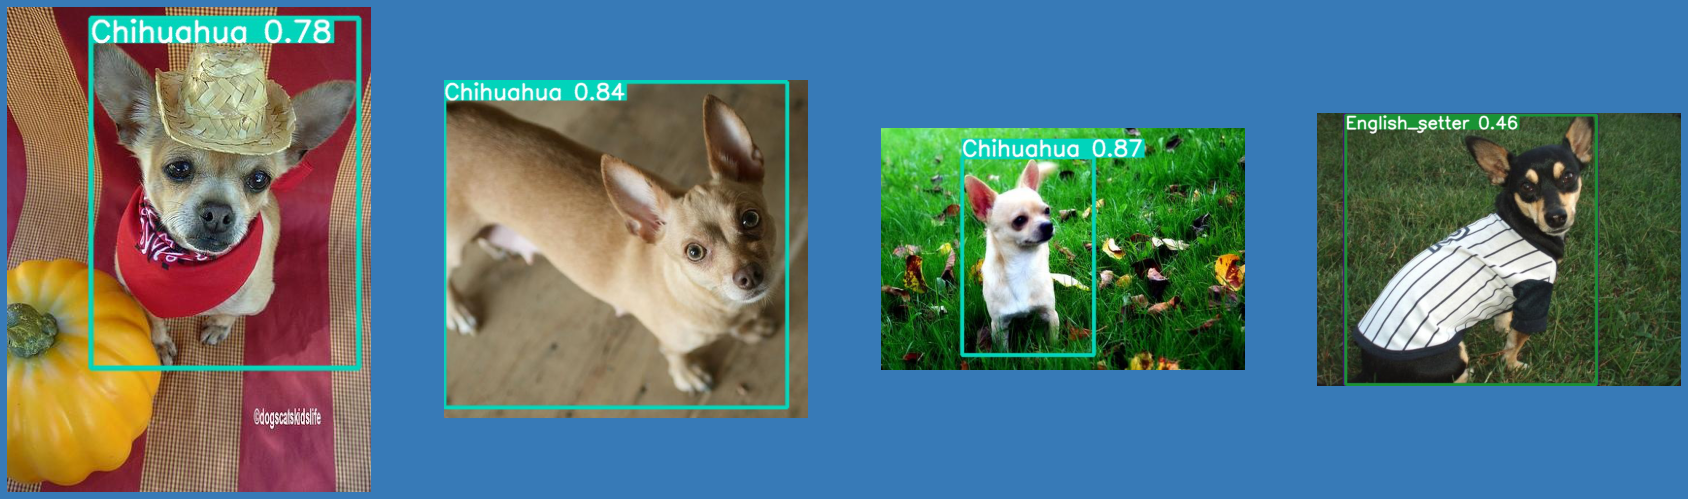

In [6]:
import matplotlib.image as imgmp
import os
show_images_from_directory("/media/ismail/Elements/formation/projet7/dogs_result_5l/l640/detect", 4)

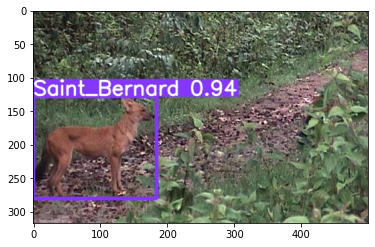

In [ ]:
import os
from PIL import Image, ImageDraw
import random
import numpy as np
import matplotlib.pyplot as plt



detections_dir = "runs/detect/dogs/"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

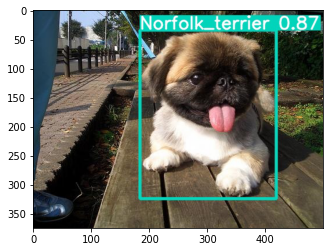

In [ ]:
random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

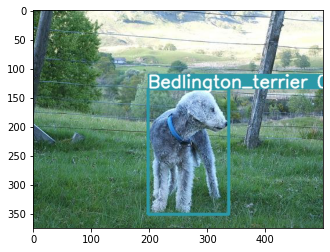

In [ ]:
random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

In [7]:
import pandas as pd
results = pd.read_csv("/media/ismail/Elements/formation/projet7/dogs_result_5l/dogs3/results.csv",skipinitialspace=True)
results

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.039547,0.017772,0.110450,0.008405,0.73302,0.014109,0.011566,0.015734,0.004249,0.089114,0.003330,0.003330,0.070029
1,1,0.027297,0.013189,0.107990,0.015786,0.26101,0.024930,0.021225,0.014671,0.004256,0.088004,0.006531,0.006531,0.039897
2,2,0.028824,0.013731,0.104700,0.152900,0.36692,0.068361,0.052178,0.018928,0.005091,0.080869,0.009601,0.009601,0.009633
3,3,0.029564,0.014554,0.098558,0.305730,0.31466,0.152690,0.115970,0.018733,0.005275,0.073710,0.009406,0.009406,0.009406
4,4,0.028182,0.014274,0.091655,0.314470,0.39725,0.260740,0.209240,0.016908,0.004647,0.065187,0.009406,0.009406,0.009406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,45,0.018010,0.010339,0.035654,0.797350,0.79055,0.852080,0.771510,0.010060,0.003294,0.020252,0.001288,0.001288,0.001288
46,46,0.017652,0.010168,0.035255,0.795480,0.79189,0.852510,0.771320,0.010080,0.003306,0.020148,0.001090,0.001090,0.001090
47,47,0.017132,0.010226,0.033720,0.791360,0.79981,0.853160,0.772960,0.010031,0.003308,0.019943,0.000892,0.000892,0.000892
48,48,0.016764,0.010145,0.032721,0.803820,0.79102,0.853550,0.774340,0.010008,0.003311,0.019939,0.000694,0.000694,0.000694


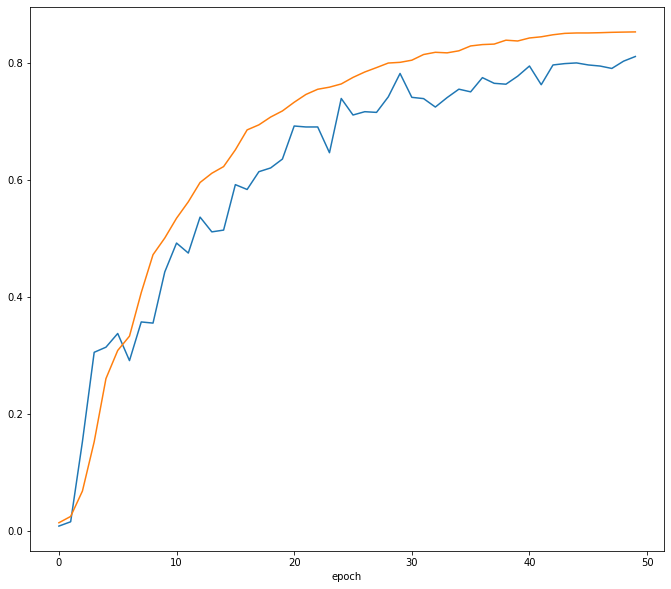

In [8]:
fig = plt.figure(figsize=(25,10))
# summarize history for accuracy
plt.subplot(1, 2, 1)
# plt.plot(results['train/box_loss'])
# plt.plot(results['train/obj_loss'])
# plt.plot(results[ 'train/cls_loss'])
plt.plot(results[ 'metrics/precision'])
# plt.plot(results['metrics/recall'])
plt.plot(results[ 'metrics/mAP_0.5'])
# plt.plot(results['metrics/mAP_0.5:0.95'])
# plt.plot(results['val/box_loss'])
# plt.plot(results['val/obj_loss'])
# plt.plot(results['val/cls_loss'])
# plt.plot(results['x/lr0'])
# plt.plot(results['x/lr1'])
# plt.plot(results[ 'x/lr2'])

# plt.title(modele_name+' '+ first_score, fontsize=18)
# plt.ylabel(first_score)
plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# # summarize history for loss
# plt.subplot(1, 2, 2)
# plt.plot(dict_history[second_score])
# plt.plot(dict_history['val_' + second_score],
#           linestyle='--', color="red")
# plt.title(modele_name +' '+ second_score, fontsize=18)
# plt.ylabel(second_score)
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
plt.show()